In [128]:
import numpy as np
import os
import datetime
import pickle
from functools import cmp_to_key

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.svm import NuSVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.neural_network import MLPClassifier


In [8]:
with open("sample (2).pkl","rb") as f:
    data = pickle.load(f)

In [3]:
def getyi(date_i,date_j):
    if date_i < date_j:
        return 1
    else:
        return 0

In [9]:
def generateYandX(data,date):
    X=np.empty((0,data.shape[1]*2))
    Y=np.empty((0,1))
    #print(data.shape)
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            if i!=j and i<j:
                yi=getyi(date[i],date[j])
                Y=np.append(Y,yi)
                point=np.append(data[i],data[j])
                point=point.reshape(1,point.shape[0])
                X=np.concatenate((X,point))   
    return X ,Y 

In [25]:
# data=np.array([[2,4,5],[3,5,7],[1,5,7],[2,5,8],[12,14,14]])
# date=np.array(["2:4:20","5:7:19","8:1:18","3:5:19","4:6:23"])

# path_to_data = os.getcwd()+"/IR_Project/"
dates = []
for doc in sorted(os.listdir(os.getcwd()+"/Temp")):
    with open(os.getcwd()+"/Text1/"+doc,"r") as f:
        doc_date = f.read()
        doc_date = doc_date[:doc_date.split(" ")[0].rfind("+")]
        d = datetime.datetime.strptime(doc_date, "%Y-%m-%dT%H:%M:%S")
        dates.append(d)

ind = int(data.shape[0]*0.75)
# print(type(dates))
X_train, X_test, y_train, y_test = data[:ind,:], data[ind:, :], dates[:ind], dates[ind:]
X_train_pairs, y_train_pairs = generateYandX(X_train, y_train)
X_test_pairs, y_test_pairs = generateYandX(X_test, y_test)
print(X_train_pairs.shape)
print(y_train_pairs.shape)
print(X_test_pairs.shape)
print(y_test_pairs.shape)

#Train test split
# X_train, X_test, y_train, y_test = train_test_split(data, dates, test_size=0.2, random_state=42)
# print(X_train.shape)
# print(X_test.shape)


# mlp = MLPClassifier((20,))
# mlp.fit(X_train_pairs, y_train_pairs)

(300, 400)
(300,)
(36, 400)
(36,)


<h3>Models For Learning</h3>

In [58]:
#Logistic Regression
#Model
lg=LogisticRegression(random_state=0).fit(X_train_pairs,y_train_pairs)

#Predictiona and accuracy
y_pred_train = lg.predict(X_train_pairs)
print("train acc: ", np.sum(y_pred_train == y_train_pairs)/len(y_pred_train))
y_pred_test = lg.predict(X_test_pairs)
print("test acc: ",np.sum(y_pred_test == y_test_pairs)/len(y_pred_test))



train acc:  0.9333333333333333
test acc:  0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [59]:
#SVM
#Model
svm1 = SVC(C=100).fit(X_train_pairs, y_train_pairs)

#Predictiona and accuracy
y_pred_train_svm = svm1.predict(X_train_pairs)
print("train acc: ", np.sum(y_pred_train_svm == y_train_pairs)/len(y_pred_train_svm))
y_pred_test_svm = svm1.predict(X_test_pairs)
print("test acc: ",np.sum(y_pred_test_svm == y_test_pairs)/len(y_pred_test_svm))

train acc:  0.9233333333333333
test acc:  0.5555555555555556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [81]:
#NuSVC
#Model
nsvc=NuSVC().fit(X_train_pairs, y_train_pairs)

#Predictiona and accuracy
y_pred_train_nsvc = nsvc.predict(X_train_pairs)
print("train acc: ", np.sum(y_pred_train_nsvc == y_train_pairs)/len(y_pred_train_nsvc))
y_pred_test_nsvc = nsvc.predict(X_test_pairs)
print("test acc: ",np.sum(y_pred_test_nsvc == y_test_pairs)/len(y_pred_test_nsvc))

train acc:  0.9133333333333333
test acc:  0.5555555555555556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [112]:
#Random Forest
#Model
rf=RandomForestClassifier(n_estimators=50,max_depth=10).fit(X_train_pairs, y_train_pairs)

#Predictiona and accuracy
y_pred_train_rf = rf.predict(X_train_pairs)
print("train acc: ", np.sum(y_pred_train_rf == y_train_pairs)/len(y_pred_train_rf))
y_pred_test_rf = rf.predict(X_test_pairs)
print("test acc: ",np.sum(y_pred_test_rf == y_test_pairs)/len(y_pred_test_rf))

train acc:  0.9966666666666667
test acc:  0.4444444444444444


In [142]:
#KNN
#Model
knn=KNeighborsClassifier(n_neighbors=7).fit(X_train_pairs, y_train_pairs)

#Predictiona and accuracy
y_pred_train_knn = knn.predict(X_train_pairs)
print("train acc: ", np.sum(y_pred_train_knn == y_train_pairs)/len(y_pred_train_knn))
y_pred_test_knn = knn.predict(X_test_pairs)
print("test acc: ",np.sum(y_pred_test_knn == y_test_pairs)/len(y_pred_test_knn))

train acc:  0.71
test acc:  0.6111111111111112


<h3>Ranking</h3>

In [32]:
with open("Dict_vec_names (1).pkl","rb") as f:
    tuple1 = pickle.load(f)

In [ ]:
for tup in tuple1:
    print(tup[0])

In [151]:
def greater(d1, d2):
    v1 = np.append(d1[1],d2[1])
    v1.shape = 1, v1.shape[0]
    if knn.predict(v1) == 1:
        return -1
    else:
        return 1

test_tuple1 = tuple1[ind:]
test_tuple1_sorted=sorted(test_tuple1, key=cmp_to_key(greater))

In [ ]:
for tup in test_tuple1_sorted:
    print(tup[0])

In [ ]:
actual = []
path1 = os.getcwd()+"/Text1/"
for doc in sorted(os.listdir(path1)):
    if doc not in os.listdir(os.getcwd()+"/Temp"): continue
    with open(path1+doc,"r") as f:
        doc_date = f.read()
        doc_date = doc_date[:doc_date.split(" ")[0].rfind("+")]
        d = datetime.datetime.strptime(doc_date, "%Y-%m-%dT%H:%M:%S")
        actual.append((doc, d))

actual

In [71]:
test_actual = actual[ind:]
test_actual_sorted = sorted(test_actual, key=lambda x: x[1])

In [ ]:
for doc in test_actual_sorted:
    print(doc[0])

In [73]:
test_tuple1_sorted, test_actual_sorted
print(len(test_actual_sorted))

9


In [74]:
rank = [i for i in range(len(test_actual_sorted),0,-1)]
print(rank)

[9, 8, 7, 6, 5, 4, 3, 2, 1]


In [ ]:
Dict_score={}
rank = [i for i in range(len(test_actual_sorted),0,-1)]
for i in range(0,len(test_actual_sorted)):
    Dict_score.update({test_actual_sorted[i][0]:rank[i]})
print(Dict_score)

In [76]:
import numpy as np
IDCG=0
i=1
for item in test_actual_sorted:
    temp=Dict_score.get(item[0])
    temp=temp/np.log(i+1)
    i=i+1
    IDCG=IDCG+temp

print(IDCG)
    

36.67698668313871


In [126]:
DCG=0
i=1
for item in test_tuple1_sorted:
    temp=Dict_score.get(item[0])
    temp=temp/np.log(i+1)
    i=i+1
    DCG=DCG+temp

print(DCG)
    

25.964888932431634


In [127]:
print(DCG/IDCG)

0.7079340829373073


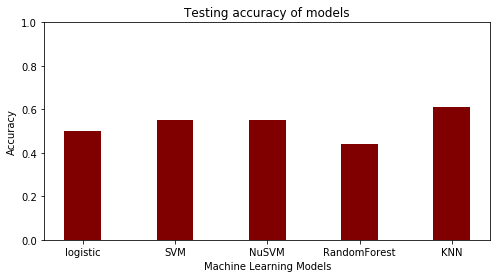

In [10]:
import matplotlib.pyplot as plt

models=['logistic','SVM','NuSVM','RandomForest','KNN']
train_acc=[0.933,0.923,0.913,0.99,0.71]
test_acc=[0.50,0.55,0.55,0.44,0.61]

fig = plt.figure(figsize = (8, 4)) 
  
# creating the bar plot 
plt.bar(models, test_acc, color ='maroon', width = 0.4) 
plt.ylim(0.0,1.0)
plt.xlabel("Machine Learning Models") 
plt.ylabel("Accuracy") 
plt.title("Testing accuracy of models") 
plt.show()